<a href="https://colab.research.google.com/github/JairusTheAnalyst/JairusTheAnalyst/blob/main/CNN_Mini_Project_CIFAR_10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# =====================================================================
# CNN Mini-Project: CIFAR-10 Classification

                Jairus Otana Mulongo
# =====================================================================


In [1]:

# -------------------------
# Step 1: Imports
# -------------------------
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models, utils
from sklearn.metrics import classification_report, confusion_matrix


In [2]:

# -------------------------
# Step 2: Load CIFAR-10 Dataset
# -------------------------
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Train labels shape: {y_train.shape}, Test labels shape: {y_test.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train shape: (50000, 32, 32, 3), Test shape: (10000, 32, 32, 3)
Train labels shape: (50000, 1), Test labels shape: (10000, 1)


In [3]:
# -------------------------
# Step 3: Normalize and One-Hot Encode Labels
# -------------------------
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train_cat = utils.to_categorical(y_train, 10)
y_test_cat = utils.to_categorical(y_test, 10)


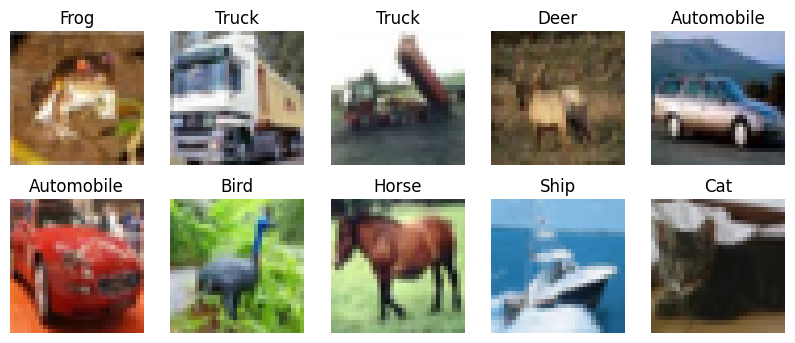

In [4]:

# -------------------------
# Step 4: Visualize Some Images
# -------------------------
classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
           'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.title(classes[y_train[i][0]])
    plt.axis('off')
plt.show()


In [5]:
# -------------------------
# Step 5: Build the CNN Model
# -------------------------
model = models.Sequential([
    # Convolution + Pooling
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:


# -------------------------
# Step 6: Compile Model
# -------------------------
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:

# -------------------------
# Step 7: Train Model
# -------------------------
history = model.fit(X_train, y_train_cat,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.2)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 131ms/step - accuracy: 0.2898 - loss: 1.9107 - val_accuracy: 0.5245 - val_loss: 1.3525
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 103s 164ms/step - accuracy: 0.5119 - loss: 1.3684 - val_accuracy: 0.6161 - val_loss: 1.0948
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 88s 141ms/step - accuracy: 0.5857 - loss: 1.1630 - val_accuracy: 0.6297 - val_loss: 1.0359
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 134ms/step - accuracy: 0.6409 - loss: 1.0319 - val_accuracy: 0.6946 - val_loss: 0.8893
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 132ms/step - accuracy: 0.6668 - loss: 0.9443 - val_accuracy: 0.6980 - val_loss: 0.8810
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 134ms/step - accuracy: 0.6898 - loss: 0.8841 - val_accuracy: 0.7099 - val_loss: 0.8350
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 130ms/step - accuracy: 0.7200 - loss: 0.8022 - val_accuracy: 0.7304 - val_loss: 0.7784
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 130ms/step - accuracy: 0.7310 - loss: 

313/313 - 7s - 21ms/step - accuracy: 0.7433 - loss: 0.9061

Test Accuracy: 0.7433
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step

Classification Report:
              precision    recall  f1-score   support

    Airplane       0.79      0.79      0.79      1000
  Automobile       0.87      0.88      0.87      1000
        Bird       0.70      0.58      0.64      1000
         Cat       0.53      0.60      0.56      1000
        Deer       0.73      0.65      0.68      1000
         Dog       0.56      0.72      0.63      1000
        Frog       0.84      0.74      0.79      1000
       Horse       0.81      0.79      0.80      1000
        Ship       0.85      0.85      0.85      1000
       Truck       0.83      0.84      0.83      1000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000



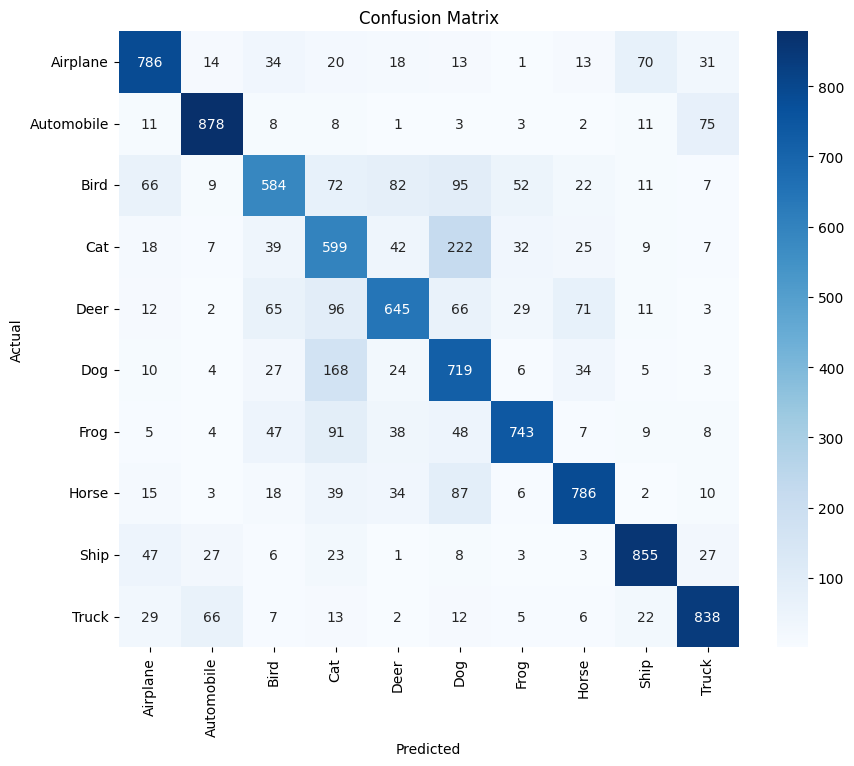

In [8]:
# -------------------------
# Step 8: Evaluate Model
# -------------------------
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Predict classes
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=classes))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

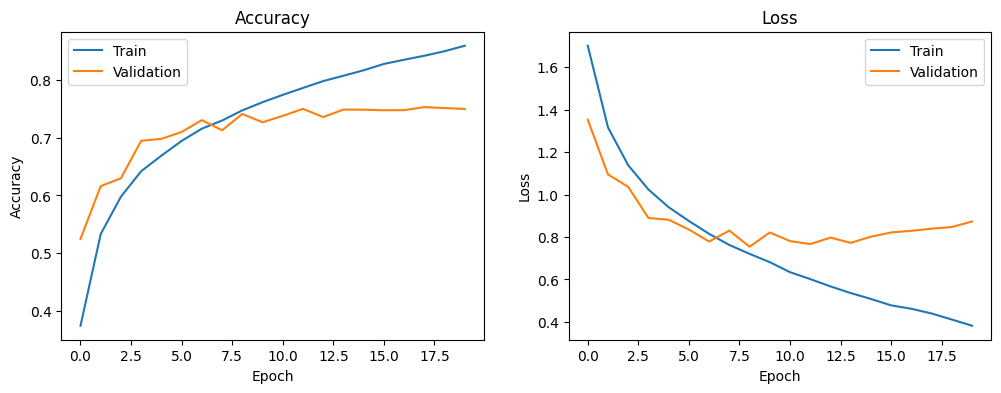

In [9]:

# -------------------------
# Step 9: Plot Training History
# -------------------------
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()


**Challenges Faced During the Project**

**Class Imbalance and Confusion:**

Certain classes, especially animals like cats, dogs, and birds, were visually similar and harder for the CNN to distinguish.

The model tended to misclassify these classes, lowering recall and F1-score for them.

**Limited Model Depth:**

Using a simple CNN architecture restricted the model’s ability to learn complex hierarchical features.

This affected performance on challenging classes that require more nuanced feature extraction.

**Overfitting Risk:**

With a relatively small number of training samples per class (especially for diverse animal images), the CNN was prone to overfitting.

Needed careful monitoring of training and validation metrics.

**Computational Constraints:**

Training deeper networks or performing extensive hyperparameter tuning was limited by hardware/GPU availability.

This affected the ability to experiment with more advanced architectures like ResNet or EfficientNet.

**Hyperparameter Selection:**

Finding optimal learning rates, batch sizes, and optimizer settings required multiple trial-and-error runs.

Initial runs often led to unstable training or slow convergence.

**Data Preprocessing & Normalization:**

Scaling image pixel values and ensuring consistency in input shape were essential to prevent training issues.

Minor preprocessing mistakes could lead to poor performance or slow convergence.

**Evaluation Complexity:**

Measuring performance only with accuracy was insufficient due to inter-class variation.

Needed precision, recall, and F1-score to understand class-specific strengths and weaknesses.